In [7]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm
from pde import PDE,CartesianGrid, MemoryStorage, ScalarField, UnitGrid, CartesianGrid, MemoryStorage,FieldCollection,plot_kymograph



In [5]:

storage = MemoryStorage()

# define the PDE
a, b = 1, 3
d0, d1 = 1, 0.1
eq = PDE(
    {
        "u": f"{d0} * laplace(u) + {a} - ({b} + 1) * u + u**2 * v",
        "v": f"{d1} * laplace(v) + {b} * u - u**2 * v",
    }
)

# initialize state
grid = UnitGrid([64, 64])
u = ScalarField(grid, a, label="Field $u$")
v = b / a + 0.1 * ScalarField.random_normal(grid, label="Field $v$")
state = FieldCollection([u, v])

# simulate the pde
# tracker = PlotTracker(interval=1, plot_args={"vmin": 0, "vmax": 5})
sol = eq.solve(state, t_range=6000, dt=0.0002, tracker=["progress",storage.tracker(0.002)])

100%|██████████| 1.0/1.0 [00:16<00:00, 16.63s/it]      


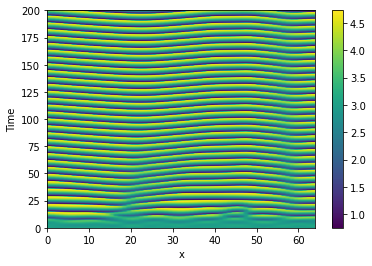

In [55]:

plot_kymograph(storage,field_index=1)




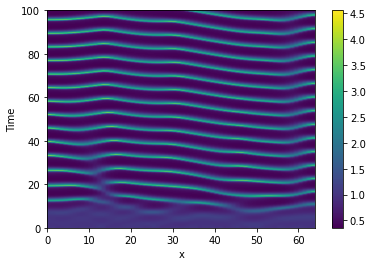

In [42]:
plot_kymograph(storage,field_index=0)


In [8]:
trajectory_data = np.array(storage.data)

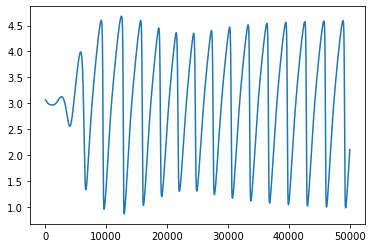

In [44]:
plt.plot(trajectory_data[10:,1,9,45])

In [9]:
trajectory_data.shape

(3000001, 2, 64, 64)

In [10]:
trajectory_data = trajectory_data[10000:-1]

In [ ]:
np.save("high_res_data.npy",trajectory_data)

In [3]:
trajectory_data = np.load("high_res_data.npy")

In [11]:
regridded = np.mean(trajectory_data.reshape((5,-1,2,64,64),order="F"),axis=0)

In [13]:
regridded.shape

(598000, 2, 64, 64)

In [12]:
np.save("coarse_grained_extra.npy",regridded)